In [6]:
#tutorial 1 -  getting data from Tiingo (API)
#Input: Tiingo API
#Output: Daily chart data of a specific ticker

import os
import pandas_datareader as pdr

#Go to Tiingo API to create an account - and they will provide an 
#API key to you that gives you free permission to grasp free daily price data.

#Replace your API key here
df = pdr.get_data_tiingo('SPY', api_key='f0f2dac586726c8b6d19534c263f4874cc8b989c')

print(df)

                                       close        high         low  \
symbol date                                                            
SPY    2016-11-11 00:00:00+00:00  216.419998  216.699997  215.320007   
       2016-11-14 00:00:00+00:00  216.589996  217.270004  215.720001   
       2016-11-15 00:00:00+00:00  218.279999  218.279999  216.800003   
       2016-11-16 00:00:00+00:00  217.869995  218.139999  217.419998   
       2016-11-17 00:00:00+00:00  218.990005  219.059998  217.919998   
...                                      ...         ...         ...   
       2021-11-03 00:00:00+00:00  464.720000  465.150000  460.830000   
       2021-11-04 00:00:00+00:00  466.910000  467.000000  464.990000   
       2021-11-05 00:00:00+00:00  468.530000  470.650000  466.920000   
       2021-11-08 00:00:00+00:00  468.930000  470.230000  468.203100   
       2021-11-09 00:00:00+00:00  467.380000  469.570000  465.880000   

                                        open    volume    adjCl

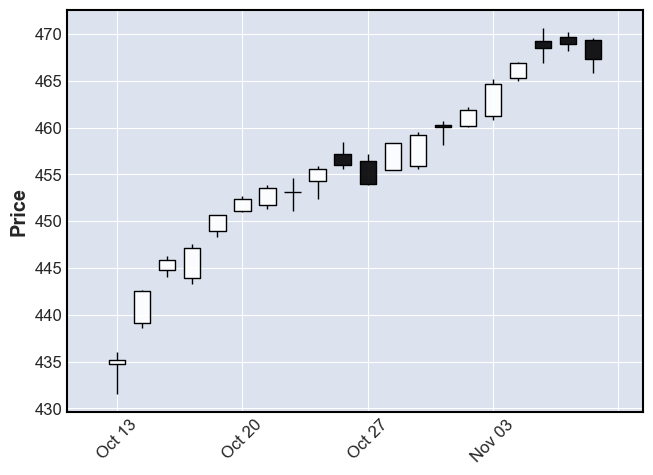

In [23]:
#tutorial 2 - Create 

#(from tutorial 1)
import os
import pandas_datareader as pdr

df = pdr.get_data_tiingo('SPY', api_key='f0f2dac586726c8b6d19534c263f4874cc8b989c')


# multi-index --> single index
df = df.reset_index(level=[0,1])

# Appooint "date" as the index
df.index = df['date']

# Extract column 7 to 11 information (refer to the above box)
df_adj = df.iloc[:,7:11]

# Rename the column, such that mplfinance could understand it
df_adj.columns = ['Close','High','Low','Open']

# Grap the last 20 days financial data
df_adj_20d = df_adj.iloc[-20:,:]

# Plot the chart
import mplfinance as mpf
mpf.plot(df_adj_20d,type='candle')


#(Generated question: what is level=[0,1],  what's the meaning of [0,1]?)
#(Generated question: do I need to copy and paste the prior command lines to each new individual cell?)

In [19]:
#Tutorial 3 - Analyze price data


#(tutorial 1)
import os
import pandas_datareader as pdr
SPY = pdr.get_data_tiingo('SPY', api_key='f0f2dac586726c8b6d19534c263f4874cc8b989c')

#(Tutorial 2)
SPY = SPY.reset_index(level=[0,1])
SPY.index = SPY['date']
SPY_adj = SPY.iloc[:,7:11]
SPY_adj.columns = ['Close','High','Low','Open']
SPY_adj_2019 = SPY_adj.loc['2019']

#Tutorial 3a - handling the data 
SPY_adj_2019_Open = SPY_adj_2019.Open
SPY_adj_2019_Close = SPY_adj_2019.Close
SPY_DailyChg_2019 = SPY_adj_2019_Close - SPY_adj_2019_Open
SPY_Abs_DailyChg_2019 = abs(SPY_DailyChg_2019)

#Tutorial 3b - Get the description of the data
SPY_Abs_DailyChg_2019.describe()

count    252.000000
mean       1.137349
std        1.077339
min        0.000000
25%        0.377131
50%        0.759838
75%        1.613073
max        5.842609
dtype: float64

In [24]:
# Programming the screening condition of evening stars
evening_condition_1 = [0,0]
for i in range(2, len(SPY_DailyChg_2019)):
    if ( SPY_DailyChg_2019[i-2] > 1.158 ) & ( abs(SPY_DailyChg_2019[i-1]) < 0.388 ) & ( SPY_DailyChg_2019[i] < -0.58 ):
        evening_condition_1.append(1)
    else:
        evening_condition_1.append(0)

# condition 1 - matching frequency
evening_condition_1.count(1)


evening_condition_2 = [0,0]
for i in range(2, len(SPY_adj_2019_Open)):
    if ( SPY_adj_2019_Open[i-1] > SPY_adj_2019_Close[i-2] ) & ( SPY_adj_2019_Open[i-1] > SPY_adj_2019_Open[i] ) & ( SPY_adj_2019_Close[i-1] > SPY_adj_2019_Close[i-2] ) & ( SPY_adj_2019_Close[i-1] > SPY_adj_2019_Open[i] ):
        evening_condition_2.append(1)
    else:
        evening_condition_2.append(0)
evening_condition_2.count(1)

# Evening Star Signal
evening_star_signal = []
for i in range(len(evening_condition_1)):
    if ( evening_condition_1[i] == 1 ) & ( evening_condition_2[i] == 1 ):
        evening_star_signal.append(1)
    else:
        evening_star_signal.append(0)
        
# Find Evening Star date
for i in range(len(evening_star_signal)):
    if evening_star_signal[i] == 1:
        print(SPY_adj_2019.index[i])

print(evening_condition_1.count(1))

2019-08-20 00:00:00+00:00
4


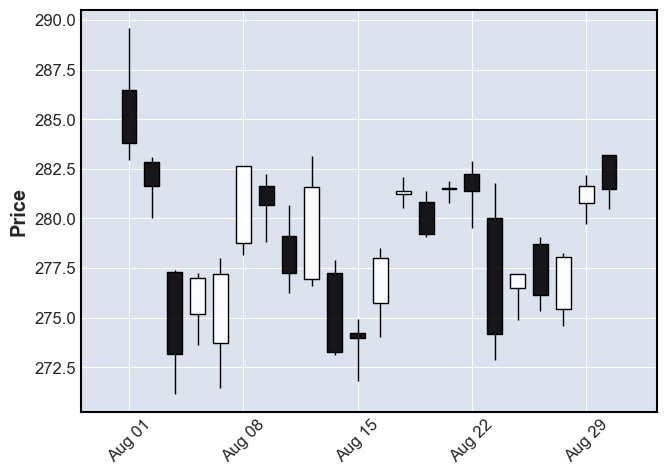

In [26]:
#Revisiting the tutorial 3 
SPY_adj_2019_Aug = SPY_adj_2019.loc['2019-08']
mpf.plot(SPY_adj_2019_Aug,type='candle')


#Remark: Oh, the evening star is recognized correctly.

In [28]:
#Tutorial 4   Using K patterns to trade

#  N days Return
SPY_Open_adj = SPY_adj.Open
# Return after holding 1 day and 5 days
ret1 = SPY_Open_adj.shift(-2) / SPY_Open_adj.shift(-1)
ret5 = SPY_Open_adj.shift(-6) / SPY_Open_adj.shift(-1)
ret1

date
2016-11-11 00:00:00+00:00    1.000046
2016-11-14 00:00:00+00:00    1.002396
2016-11-15 00:00:00+00:00    1.002252
2016-11-16 00:00:00+00:00    1.004678
2016-11-17 00:00:00+00:00    1.000456
                               ...   
2021-11-03 00:00:00+00:00    1.008424
2021-11-04 00:00:00+00:00    1.000895
2021-11-05 00:00:00+00:00    0.999191
2021-11-08 00:00:00+00:00         NaN
2021-11-09 00:00:00+00:00         NaN
Name: Open, Length: 1257, dtype: float64

In [29]:
# Create a function to catch "evening star" chart pattern


def Evening_Star_Sig(data):
    # Open / close
    data_Open = data.Open
    data_Close = data.Close
    data_DailyChg = data_Close - data_Open
    data_Abs_DailyChg = abs(data_DailyChg)
    
    # Statistics
    mean = data_Abs_DailyChg.mean()
    first_quar = data_Abs_DailyChg.quantile(q=0.25)
    
    # Condition1
    evening_condition_1 = [0,0]
    for i in range(2, len(data_DailyChg)):
        if ( data_DailyChg[i-2] > mean ) & ( abs(data_DailyChg[i-1]) < first_quar ) & ( data_DailyChg[i] < -0.5*mean ):
            evening_condition_1.append(1)
        else:
            evening_condition_1.append(0)
            
    # Condition2
    evening_condition_2 = [0,0]
    for i in range(2, len(data_Open)):
        if ( data_Open[i-1] > data_Close[i-2] ) & ( data_Open[i-1] > data_Open[i] ) & ( data_Close[i-1] > data_Close[i-2] ) & ( data_Close[i-1] > data_Open[i] ):
            evening_condition_2.append(1)
        else:
            evening_condition_2.append(0)
            
    # Evening Star Signal
    evening_star_signal = []
    for i in range(len(evening_condition_1)):
        if ( evening_condition_1[i] == 1 ) & ( evening_condition_2[i] == 1 ):
            evening_star_signal.append(1)
        else:
            evening_star_signal.append(0)
            
    # Return a boolean series
    import pandas as pd
    sig = pd.Series(index = data.index, data = evening_star_signal)
    sig = sig.astype('bool')
    return sig

In [30]:
# Using the function
sig = Evening_Star_Sig(SPY_adj)
sig

date
2016-11-11 00:00:00+00:00    False
2016-11-14 00:00:00+00:00    False
2016-11-15 00:00:00+00:00    False
2016-11-16 00:00:00+00:00    False
2016-11-17 00:00:00+00:00    False
                             ...  
2021-11-03 00:00:00+00:00    False
2021-11-04 00:00:00+00:00    False
2021-11-05 00:00:00+00:00    False
2021-11-08 00:00:00+00:00    False
2021-11-09 00:00:00+00:00    False
Length: 1257, dtype: bool

In [33]:
ret1 = SPY_Open_adj.shift(-2) / SPY_Open_adj.shift(-1)
ret5 = SPY_Open_adj.shift(-6) / SPY_Open_adj.shift(-1)

ret1[sig].mean()
# 1.0001251917245995

ret5[sig].mean()
# 0.990058399305416

0.9902520046450715

Text(0, 0.5, 'Average return(%)')

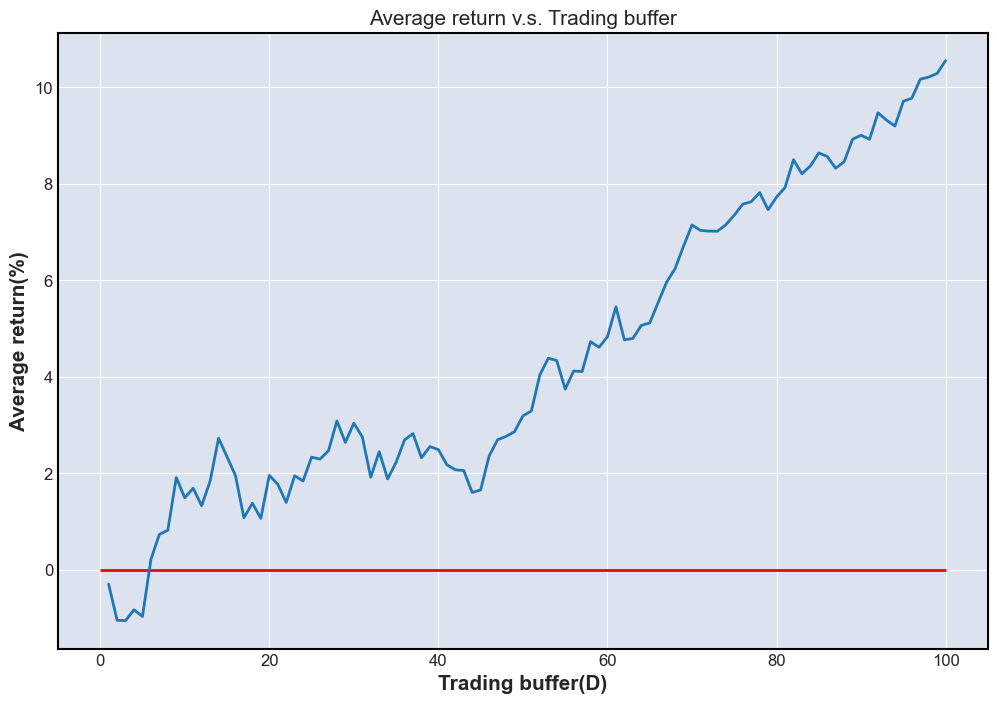

In [36]:
# Plot the return rate
rets = []
for i in range(2,102):
    ret = SPY_Open_adj.shift(-i) / SPY_Open_adj.shift(-1)
    rets.append(ret[sig].mean())
    
# Plot the return rate chart
import pandas as pd
import matplotlib.pyplot as plt
ret_df = pd.DataFrame(index=range(1,101),data=rets)
ret_df.columns = ['return']
ret_df = (ret_df-1) * 100
plt.figure(figsize=(12,8))
plt.plot(ret_df)
plt.hlines(y=0, xmin=0, xmax=100, color='red')
plt.title("Average return v.s. Trading buffer",fontsize=15)
plt.xlabel("Trading buffer(D)", fontsize=15)
plt.ylabel("Average return(%)", fontsize=15)

In [39]:
#Tutorial 5 - using python to calculate RSI

#Import data from data source
import os
import pandas_datareader as pdr
SPY = pdr.get_data_tiingo('SPY', api_key='f0f2dac586726c8b6d19534c263f4874cc8b989c')
SPY = SPY.reset_index(level=[0,1])
SPY.index = SPY['date']
SPY_adj = SPY.iloc[:,7:12]
SPY_adj.columns = ['Close','High','Low','Open','Volume']

# Dataframe
import pandas as pd
Close = SPY_adj.Close
Chg = Close - Close.shift(1)
Chg_pos = pd.Series(index=Chg.index, data=Chg[Chg>0])
Chg_pos = Chg_pos.fillna(0)
Chg_neg = pd.Series(index=Chg.index, data=-Chg[Chg<0])
Chg_neg = Chg_neg.fillna(0)

# Statistics
import numpy as np
up_mean_12 = []
down_mean_12 = []
for i in range(13,len(Chg_pos)+1):
    up_mean_12.append(np.mean(Chg_pos.values[i-12:i]))
    down_mean_12.append(np.mean(Chg_neg.values[i-12:i]))

    # Calculate RSI12
rsi_12 = []
for i in range(len(up_mean_12)):
    rsi_12.append( 100 * up_mean_12[i] / ( up_mean_12[i] + down_mean_12[i] ) )
rsi_12_series = pd.Series(index = Close.index[12:], data = rsi_12)

rsi_12_series

date
2016-11-30 00:00:00+00:00    72.247133
2016-12-01 00:00:00+00:00    65.618442
2016-12-02 00:00:00+00:00    58.793908
2016-12-05 00:00:00+00:00    67.643721
2016-12-06 00:00:00+00:00    66.035433
                               ...    
2021-11-03 00:00:00+00:00    88.938250
2021-11-04 00:00:00+00:00    88.282353
2021-11-05 00:00:00+00:00    88.199052
2021-11-08 00:00:00+00:00    87.746063
2021-11-09 00:00:00+00:00    83.317757
Length: 1245, dtype: float64

In [40]:
# Creating RSI function
def RSI(Close, period=12):
    import pandas as pd
    Chg = Close - Close.shift(1)
    Chg_pos = pd.Series(index=Chg.index, data=Chg[Chg>0])
    Chg_pos = Chg_pos.fillna(0)
    Chg_neg = pd.Series(index=Chg.index, data=-Chg[Chg<0])
    Chg_neg = Chg_neg.fillna(0)
    
    import numpy as np
    up_mean = []
    down_mean = []
    for i in range(period+1, len(Chg_pos)+1):
        up_mean.append(np.mean(Chg_pos.values[i-period:i]))
        down_mean.append(np.mean(Chg_neg.values[i-period:i]))
    

    rsi = []
    for i in range(len(up_mean)):
        rsi.append( 100 * up_mean[i] / ( up_mean[i] + down_mean[i] ) )
    rsi_series = pd.Series(index = Close.index[period:], data = rsi)
    return rsi_series

RSI(Close)

date
2016-11-30 00:00:00+00:00    72.247133
2016-12-01 00:00:00+00:00    65.618442
2016-12-02 00:00:00+00:00    58.793908
2016-12-05 00:00:00+00:00    67.643721
2016-12-06 00:00:00+00:00    66.035433
                               ...    
2021-11-03 00:00:00+00:00    88.938250
2021-11-04 00:00:00+00:00    88.282353
2021-11-05 00:00:00+00:00    88.199052
2021-11-08 00:00:00+00:00    87.746063
2021-11-09 00:00:00+00:00    83.317757
Length: 1245, dtype: float64

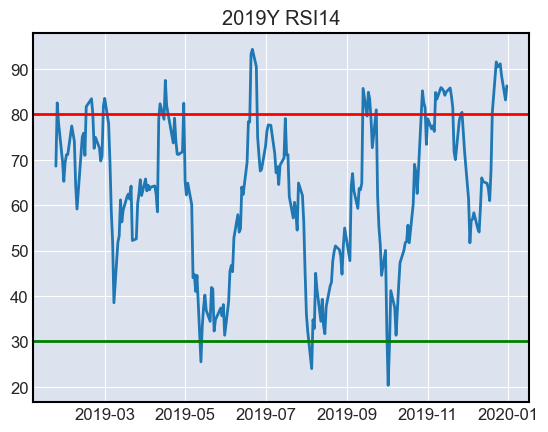

In [43]:
#tutorial 6- use RSI as a trading condition
df.index = df['date']
SPY_adj = df.iloc[:,7:12]
SPY_adj.columns = ['Close','High','Low','Open','Volume']
Close = SPY_adj.Close
Close2019 = Close['2019']


import matplotlib.pyplot as plt
RSI14_2019 = RSI(Close2019, 14)
plt.plot(RSI14_2019)
plt.title('2019Y RSI14')
plt.axhline(y=80, color='red')
plt.axhline(y=30, color='green')


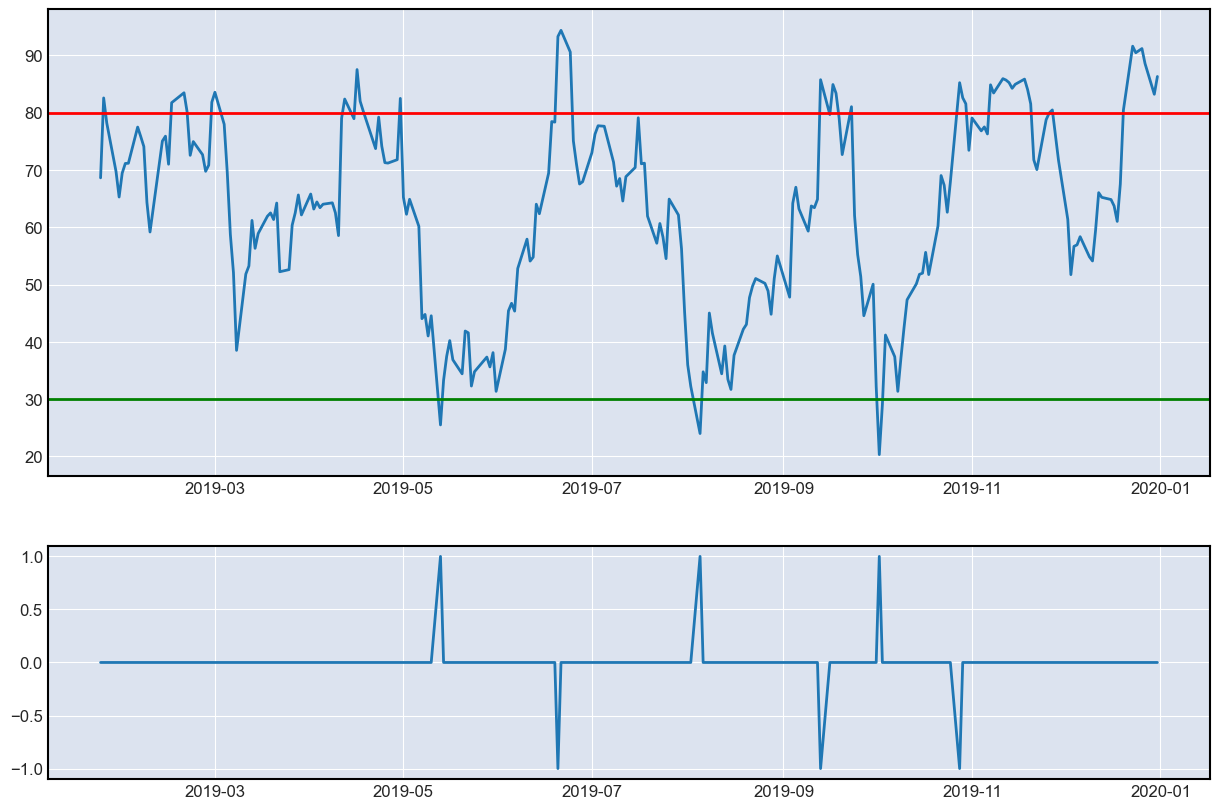

In [49]:
# 策略： RSI14 < 30 買進，RSI14 > 80 賣出

# 訊號標籤
sig = []

# 庫存標籤，只會是0或1，表示每次交易都是買進或賣出所有部位
stock = 0

# 偵測RSI14訊號
for i in range(len(RSI14_2019)):
    if RSI14_2019[i] > 80 and stock == 1:
        stock -= 1
        sig.append(-1)
    elif RSI14_2019[i] < 30 and stock == 0:
        stock += 1
        sig.append(1)
    else:
        sig.append(0)
# 將訊號整理成dataframe
rsi_sig = pd.Series(index = RSI14_2019.index, data = sig)


import numpy as np
from matplotlib import gridspec
import pandas as pd

fig = plt.figure(figsize=(15,10))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
# line0 = ax0.plot(x, y, color='r')
ax0.plot(RSI14_2019)
ax0.axhline(y=80, color='red')
ax0.axhline(y=30, color='green')

#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
rsi_sig = pd.Series(index = rsi_sig.index, data = list(rsi_sig.values))
ax1.plot(rsi_sig)


In [50]:
# Backtesting
Open = SPY_adj.Open
Open2019 = Open['2019']


rets = []
stock = 0
buy_price = 0
sell_price = 0


for i in range(len(rsi_sig)):
    if rsi_sig[i] == 1:
        buy_price = Open2019[rsi_sig.index[i+1]]
        stock += 1
    elif rsi_sig[i] == -1:
        sell_price = Open2019[rsi_sig.index[i+1]]
        stock -= 1
        rets.append((sell_price-buy_price)/buy_price)
        buy_price = 0
        sell_price = 0

    
total_ret = 1
for ret in rets:
    total_ret *= 1 + ret
print(str(round((total_ret - 1)*100,2)) + '%')

15.72%
